In [1]:
# Import packages and libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,\
classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

import pickle

In [2]:
#Display all columns
pd.set_option('display.max_columns', None)

In [3]:
#read the file
df0 = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

Column Name  |Description |
-----|:-----|
ID|Trip identification number|
VendorID|A code indicating the TPEP provider that provide the record.|
tpep_pickup_datetime|The date and time when the meter was engaged.|
tpep_dropoff_datetime|The date and time when the meter was disengaged.|
Passenger_count|The number of passenger in the vehicle (This is a driver-entered value)|
Trip_distance|The elapsed trip distance in miles reported by the taximeter (milles)|
PULocationID|TLC Taxi Zone in which the taximeter was engaged.|
DOLocationID|TLC Taxi Zone in which the taximeter was disengaged.|
RateCodeID|The final rate code in effect at the end of the trip.|
Store_and_fwd_flag|This flag indicates whether the trip record was held in vehicle memory before sent to the vendor because the vehicle did not have a connection to the server.|
Payment_type|A numeric code signifying how the passenger paid for the trip.|
Fare_amount|The time-and-distance fare calculated by the meter.|
Extra|Miscellaneous extras and surcharges. Currently this only include the $\$0.50$ and $\$1$ rush hour and overnight charges.|
MTA_tax|$\$0.50$ MTA tax that is automatically triggered based on the metered rate in use.| 
Improvement_surcharge|$\$0.30 $ improvement surcharge assessed trips and the flag drop. The improvement surcharge began being levied in 2015.|
Tip_amount|Tip amount - This field is automatically populated for credit card tips. Cash tips are not included.|
Tolls_amount|Total amount of all tolls paid in trips.|
Total_amount|The total amount charged to passengers. Does not include chas tips.|

In [4]:
df0.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


In [5]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [6]:
df0.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [7]:
#Check missing values
df0.isnull().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [8]:
#Check for duplicates
df0.duplicated().sum()

0

### Convert pickup & dropoff columns to datetime

In [9]:
#check the format
df0['tpep_pickup_datetime'][0]

'03/25/2017 8:55:43 AM'

In [10]:
#Convert datetime columns to datetime format
df0['tpep_pickup_datetime'] = pd.to_datetime(df0['tpep_pickup_datetime'], format = '%m/%d/%Y %I:%M:%S %p')
df0['tpep_dropoff_datetime'] = pd.to_datetime(df0['tpep_dropoff_datetime'], format = '%m/%d/%Y %I:%M:%S %p')

In [11]:
#Check the format 
print('Data type of tpep_pickup_datetime:', df0['tpep_pickup_datetime'].dtype)
print('Data type of tpep_dropoff_datetime:', df0['tpep_dropoff_datetime'].dtype)

Data type of tpep_pickup_datetime: datetime64[ns]
Data type of tpep_dropoff_datetime: datetime64[ns]


### Create duration column

In [12]:
df0['duration'] = (df0['tpep_dropoff_datetime'] - df0['tpep_pickup_datetime'])/np.timedelta64(1,'m')

In [13]:
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667


### Outliers

Keeping in mind that many of the features will not be used to fit your model, the most important columns to check for outliers are likely to be:
* `trip_distance`
* `fare_amount`
* `duration`


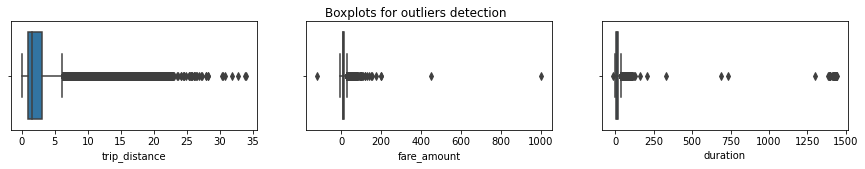

In [14]:
fig, axes = plt.subplots(1,3,figsize = (15,2))
plt.suptitle('Boxplots for outliers detection')
sns.boxplot(ax = axes[0], x = df0['trip_distance'])
sns.boxplot(ax = axes[1], x = df0['fare_amount'])
sns.boxplot(ax = axes[2], x = df0['duration']);

#### `trip_distance` outliers

In [15]:
df0['trip_distance'].describe()

count    22699.000000
mean         2.913313
std          3.653171
min          0.000000
25%          0.990000
50%          1.610000
75%          3.060000
max         33.960000
Name: trip_distance, dtype: float64

In [16]:
df0[df0['trip_distance'] > 30]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
29,94052446,2,2017-11-06 20:30:50,2017-11-07 00:00:00,1,30.83,1,N,132,23,1,80.00,0.5,0.5,18.56,11.52,0.3,111.38,209.166667
5792,68023798,2,2017-08-11 14:14:01,2017-08-11 15:17:31,1,30.33,2,N,132,158,1,52.00,0.0,0.5,14.64,5.76,0.3,73.20,63.500000
6064,49894023,2,2017-06-13 12:30:22,2017-06-13 13:37:51,1,32.72,3,N,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06,67.483333
9280,51810714,2,2017-06-18 23:33:25,2017-06-19 00:12:38,2,33.96,5,N,132,265,2,150.00,0.0,0.0,0.00,0.00,0.3,150.30,39.216667
10291,76319330,2,2017-09-11 11:41:04,2017-09-11 12:18:58,1,31.95,4,N,138,265,2,131.00,0.0,0.5,0.00,0.00,0.3,131.80,37.900000
13861,40523668,2,2017-05-19 08:20:21,2017-05-19 09:20:30,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21,60.150000
18130,90375786,1,2017-10-26 14:45:01,2017-10-26 16:12:49,1,30.50,1,N,132,220,1,90.50,0.0,0.5,19.85,8.16,0.3,119.31,87.800000


In [17]:
sorted(set(df0['trip_distance']))[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

In [18]:
print(sum(df0['trip_distance'] == 0))
print('Percentage of trips with a duration of 0 miles:', round((148/22699)*100, 2),'%')

148
Percentage of trips with a duration of 0 miles: 0.65 %


El porcentaje es tan bajo que no va a afectar a ningún modelo o predicción que hagamos por lo que podemos dejar esas filas o borrarlas. En nuestro caso vamos a dejarlas.

#### `fare_amount` outliers

In [19]:
df0['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

In [20]:
#Change the values less than $0 with 0
df0.loc[df0['fare_amount'] < 0, 'fare_amount'] = 0
df0['fare_amount'].describe()

count    22699.000000
mean        13.033832
std         13.212462
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

In [21]:
def outlier_imputer(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for col in column_list:
        # Reassign minimum to zero
        df0.loc[df0[col] < 0, col] = 0

        # Calculate upper threshold
        q1 = df0[col].quantile(0.25)
        q3 = df0[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)

        # Reassign values > threshold to threshold
        df0.loc[df0[col] > upper_threshold, col] = upper_threshold
        print(df0[col].describe())
        print()

In [22]:
outlier_imputer(['fare_amount'], 6)

fare_amount
q3: 14.5
upper_threshold: 62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64



#### `duration` outliers

In [23]:
df0['duration'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

In [24]:
df0.loc[df0['duration'] < 0, 'duration'] = 0
outlier_imputer(['duration'], 6)

duration
q3: 18.383333333333333
upper_threshold: 88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64



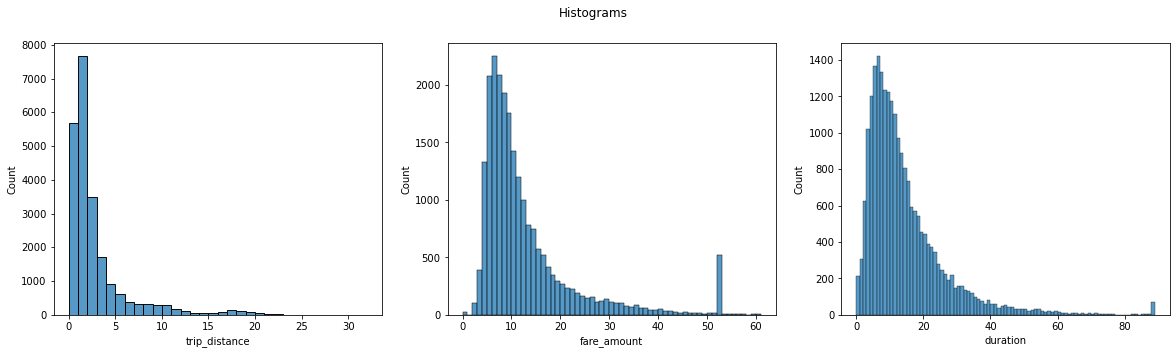

In [25]:
fig, axes = plt.subplots(1,3,figsize = (20,5))
plt.suptitle('Histograms')
sns.histplot(ax = axes[0], x = df0['trip_distance'], bins = range(0,33,1))
sns.histplot(ax = axes[1], x = df0['fare_amount'], bins = range(0, 62, 1))
sns.histplot(ax = axes[2], x = df0['duration'], bins = range(0,90,1));

### Tip study

In [26]:
df0['tip_amount'].describe()

count    22699.000000
mean         1.835781
std          2.800626
min          0.000000
25%          0.000000
50%          1.350000
75%          2.450000
max        200.000000
Name: tip_amount, dtype: float64

In [27]:
sorted(set(df0['tip_amount']), reverse = True)[:10]

[200.0, 55.5, 51.64, 46.69, 42.29, 28.0, 25.2, 25.0, 22.22, 21.3]

In [28]:
df0[df0['tip_amount'] == 200]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
8476,11157412,1,2017-02-06 05:50:10,2017-02-06 05:51:08,1,2.6,5,N,226,226,1,62.5,0.0,0.0,200.0,0.0,0.3,1200.29,0.966667


In [29]:
df0.drop(df0[(df0['tip_amount'] == 200)].index, inplace=True)

In [30]:
df0['tip_amount'].describe()

count    22698.000000
mean         1.827051
std          2.472576
min          0.000000
25%          0.000000
50%          1.350000
75%          2.450000
max         55.500000
Name: tip_amount, dtype: float64

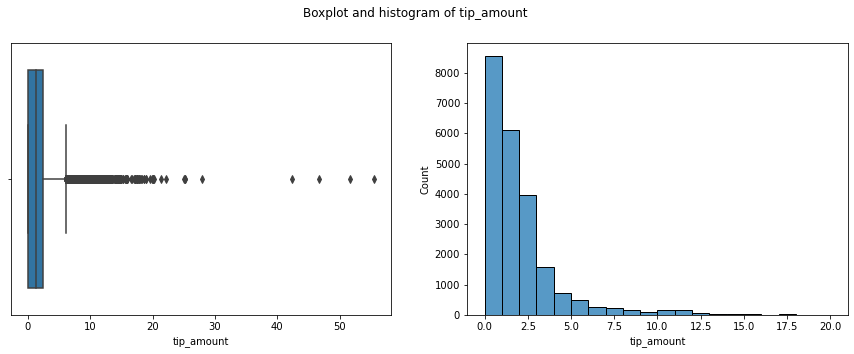

In [31]:
fig, axes = plt.subplots(1,2, figsize =(15,5))
plt.suptitle('Boxplot and histogram of tip_amount')
sns.boxplot(ax = axes[0], x = df0['tip_amount'])
sns.histplot(ax = axes[1], x = df0['tip_amount'], bins = range(0,21,1));

#### tip amount by vendor

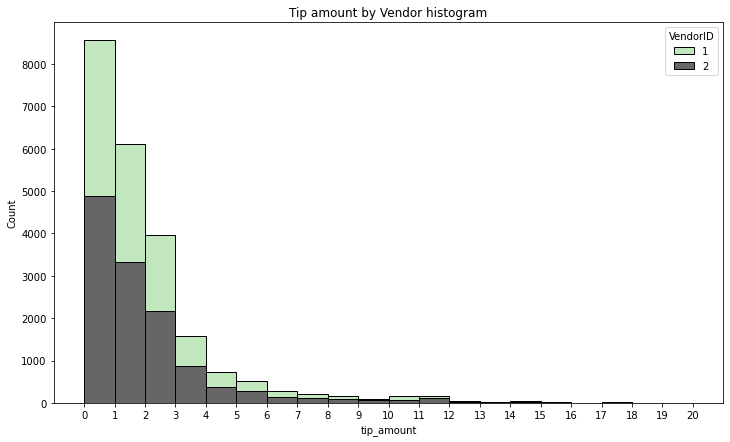

In [67]:
plt.figure(figsize = (12,7))
ax = sns.histplot(data = df0, x = 'tip_amount',bins = range(0,21,1),
                  hue = 'VendorID',
                  multiple = 'stack',
                 palette = 'Greens_d')
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('Tip amount by Vendor histogram');

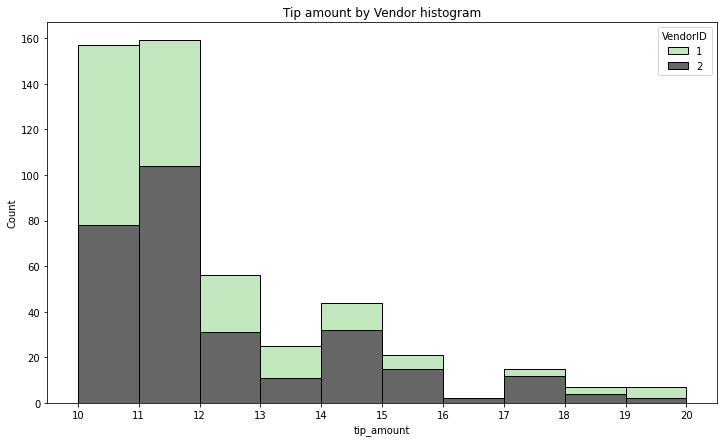

In [68]:
plt.figure(figsize = (12,7))
ax = sns.histplot(data = df0, x = 'tip_amount',bins = range(10,21,1),
                  hue = 'VendorID',
                  multiple = 'stack',
                 palette = 'Greens_d')
ax.set_xticks(range(10,21,1))
ax.set_xticklabels(range(10,21,1))
plt.title('Tip amount by Vendor histogram');

In [36]:
df0['passenger_count'].value_counts()

1    16116
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: passenger_count, dtype: int64

In [37]:
mean_tips_by_passenger_count = df0.groupby(['passenger_count'])[['tip_amount']].mean()
mean_tips_by_passenger_count

,tip_amount
passenger_count,
0,2.135758
1,1.836625
2,1.856378
3,1.716768
4,1.530264
5,1.873185
6,1.720260


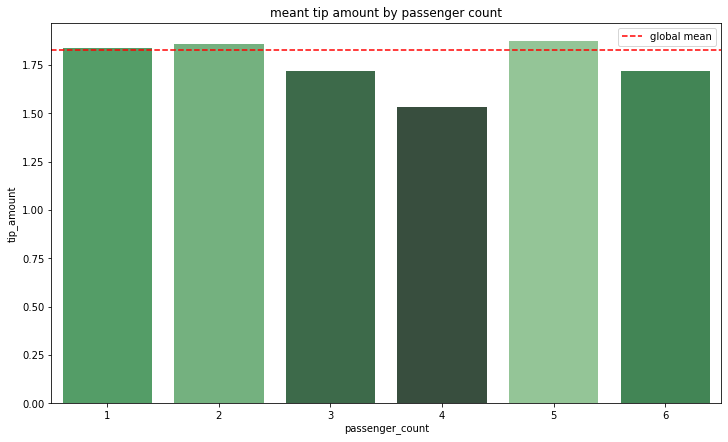

In [38]:
data = mean_tips_by_passenger_count.tail(-1)
pal = sns.color_palette("Greens_d", len(data))
rank = data['tip_amount'].argsort().argsort()
plt.figure(figsize =(12,7))
ax = sns.barplot(x = data.index, y = data['tip_amount'],
                palette = np.array(pal[::-1])[rank])
ax.axhline(df0['tip_amount'].mean(), ls = '--', color = 'red', label = 'global mean')
ax.legend()
plt.title('meant tip amount by passenger count');

#### Rides per month

In [40]:
#Create a month column
df0['month'] = df0['tpep_pickup_datetime'].dt.month_name()
#Create a day column
df0['day'] = df0['tpep_pickup_datetime'].dt.day_name()

In [41]:
#Get the total number of rides for each month
monthly_rides = df0['month'].value_counts()
monthly_rides

March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1768
September    1734
August       1724
July         1697
Name: month, dtype: int64

In [45]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'September', 'October', 'November', 'December']
monthly_rides = monthly_rides.reindex(index = month_order)
monthly_rides

January      1997
February     1768
March        2049
April        2019
May          2013
June         1964
July         1697
September    1734
October      2027
November     1843
December     1863
Name: month, dtype: int64

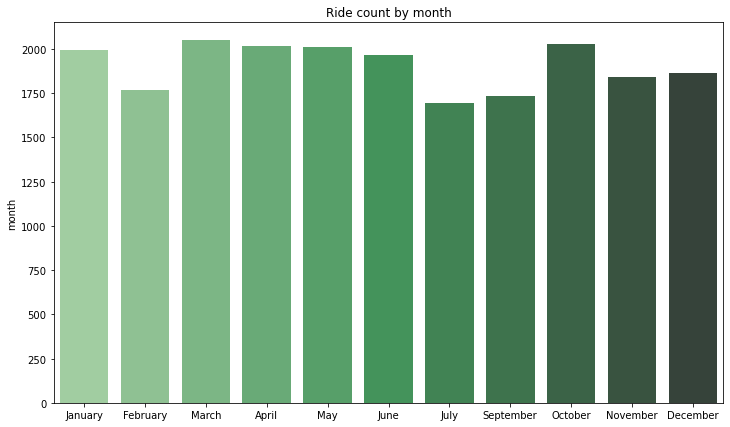

In [54]:
#Create a bar plot of total rides per month
plt.figure(figsize = (12,7))
pal = sns.color_palette("Greens_d", len(monthly_rides))
ax = sns.barplot(x = monthly_rides.index, y = monthly_rides, palette = pal)
ax.set_xticklabels(month_order)
plt.title('Ride count by month');

#### Rides per day

In [57]:
#Repeat the process, this time for days
daily_rides = df0['day'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides = daily_rides.reindex(index = day_order)
daily_rides

Monday       2930
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: day, dtype: int64

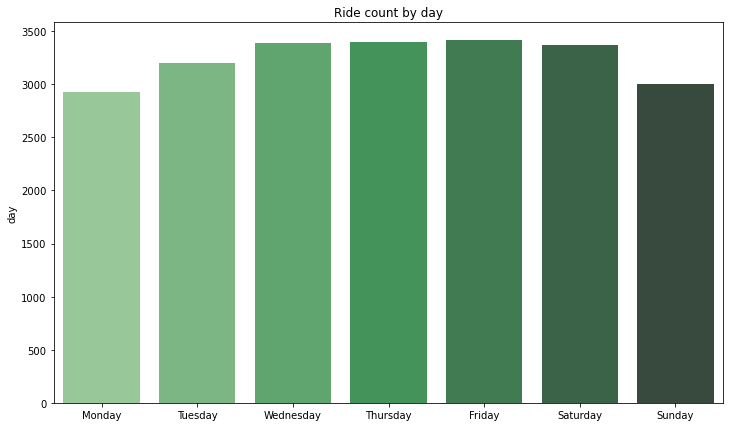

In [58]:
#Create a bar plot of total rides per day
plt.figure(figsize = (12,7))
pal = sns.color_palette("Greens_d", len(daily_rides))
ax = sns.barplot(x = daily_rides.index, y = daily_rides, palette = pal)
ax.set_xticklabels(day_order)
plt.title('Ride count by day');

#### Total revenue per day

In [60]:
#Repeat the process, this time for total revenue for day
total_amount_day = df0.groupby('day')[['total_amount']].sum()
total_amount_day = total_amount_day.reindex(index = day_order)
total_amount_day

,total_amount
day,
Monday,48374.08
Tuesday,52527.14
Wednesday,55310.47
Thursday,57181.91
Friday,55818.74
Saturday,51195.40
Sunday,48624.06


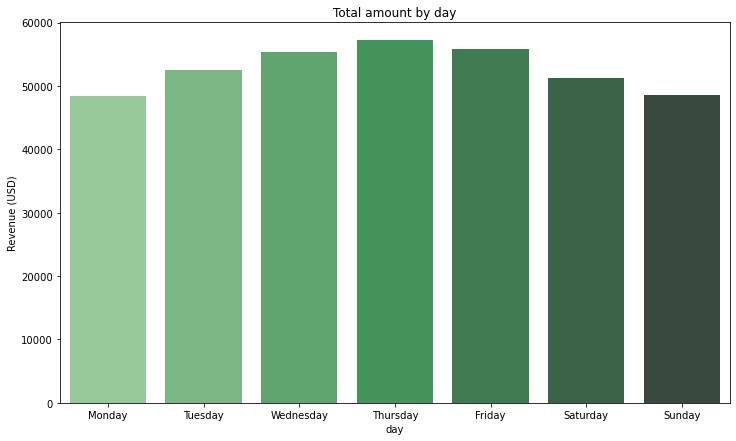

In [65]:
#Create a bar plot of total rides per day
plt.figure(figsize = (12,7))
pal = sns.color_palette("Greens_d", len(total_amount_day))
ax = sns.barplot(x = total_amount_day.index, y = total_amount_day['total_amount'], palette = pal)
ax.set_xticklabels(day_order)
ax.set_ylabel('Revenue (USD)')
plt.title('Total amount by day');

#### Total revenue per month

In [77]:
#Repeat the process, this time for total revenue by month
total_amount_month = df0.groupby('month')[['total_amount']].sum()
total_amount_month = total_amount_month.reindex(index = month_order)
total_amount_month


,total_amount
month,
January,31735.25
February,27737.60
March,33085.89
April,32012.54
May,33828.58
June,32920.52
July,26617.64
September,28206.38
October,33065.83


Text(0.5, 1.0, 'Total revenue by month')

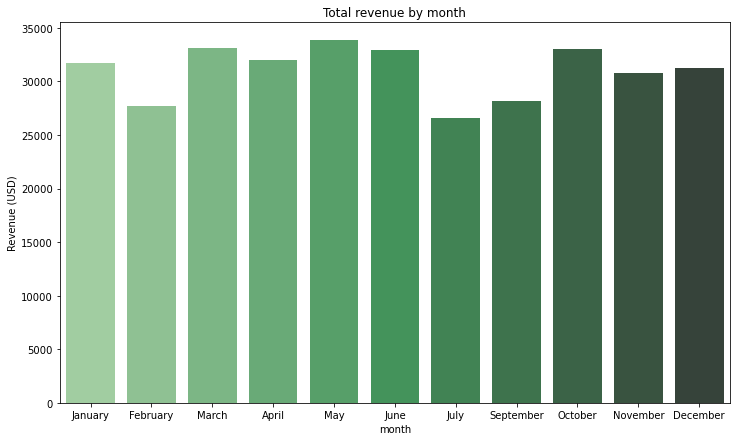

In [79]:
#bar plot
plt.figure(figsize = (12,7))
ax = sns.barplot(x = total_amount_month.index, y = total_amount_month['total_amount'], palette = 'Greens_d')
ax.set_ylabel('Revenue (USD)')
plt.title('Total revenue by month')